# CMS HOSPITAL RATING CLASSIFICATION - CAPSTONE PROJECT
### UMD C8
### Project Submission - Anita Elias
---

# Background of Business Problem
---

The **Centers for Medicare & Medicaid Services (CMS)** is an agency of the U.S. Department of Health and Human Services (HHS) which administers the major government health programs in the U.S. This includes insurance programs such as Medicare, Medicaid, and the Children’s Health Insurance Program (CHIP). CMS also plays an important role in collecting and analyzing data with the goal of improving efficiency and equity in the healthcare system. In the current project, you will be analyzing CMS data on hospital quality.  

CMS rates hospitals in the U.S. on a scale of 1-5, with the objective of making it easier for patients and consumers to compare the quality of services offered by hospitals. CMS conducts surveys each year and keeps on updating the ratings to reflect the current services being delivered by each of the hospitals.

The ratings directly influence the choice of hospitals made by consumers and may significantly impact hospitals' revenues. This project is focused on developing an approach to calculate hospital ratings and using it to identify areas of improvement for hospitals.

## Focus Areas
1. Analyze CMS data on hospital quality
2. Develop an approach to calculate hospital ratings
3. Use developed approach to identify areas of improvement for hospitals. 

## Problem Statement

Expected to work as a consultant for a non-profit organization in the US that provides recommendations to hospitals on areas they need to improve so that they can get a better rating from CMS. This would affect the overall hospital revenue as well as improve the quality of life for the patients. Also, for hospitals that are yet to be rated, the expectation is to pre-emptively help them by providing a tentative rating based on their current services and suggesting where they need to invest more in improvement.

## Import the necessary Python Libraries
---

In [4]:
import pandas as pd, numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from pandas.core.common import random_state

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Task 1 - EXPLORATORY DATA ANALYSIS
---

### Task 1: Understand the data

Take some time to familiarize yourself with the data. What are the key variables?

Specifically, answer the following questions:

- 1.1 - Perform a few basic data quality checks to understand the different columns and prepare descriptive statistics for some of the important columns.
- 1.2 - What is the distribution of hospital overall ratings? How are they varying across other parameters like `State`? Create  a few visualizations that provide some insights into the data.

##### Task 1.1

In [8]:
df = pd.read_csv("hospital-info.csv")

In [9]:
##Check the data type of the different columns
## Hint - You can use the .info() method here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                                    3057

Note down your observations after completing the above task. You should ask questions such as:

- Check for non-null columns. Do you see any column having missing values?
- Are the datatypes correct for all the variables? You might have to convert a few of them to categorical later

## OBSERVATIONS: 
---
- We have a total of 3057 entries across 93 columns with no missing values. The dataset consists of:
1) Integer data types for IDs, ratings, and comparison scores.
2) Float data types for the various quality and safety scores.
3) Object (string) data types for hospital name, address, city, state, and other categorical fields.

- **Non-null columns**: All columns are complete without any missing values, indicating complete data across all fields(non-null).

- **Data types**: Mostly appropriate for their contents. However for certain categorical variables (like "State", "Emergency Services", and "Hospital Ownership") currently represented as strings we can benefit from conversion to categorical data types to optimize memory and facilitate analysis.


##### Task 1.2

In [13]:
## Descriptive Statistics
## Let's take the main measures and the hospital overall rating first.
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

In [14]:
### Filter out the above columns from the DataFrame and compute the descriptive statistics
### Hint - The .describe() method might be useful
main_measures_stats = df[features].describe().transpose()
print("Descriptive Statistics for Main Measures:")
print(main_measures_stats)

Descriptive Statistics for Main Measures:
                                                     count      mean  \
Mortality national comparison                       3057.0  1.018973   
Safety of care national comparison                  3057.0  1.042852   
Readmission national comparison                     3057.0  0.981681   
Patient experience national comparison              3057.0  0.937848   
Effectiveness of care national comparison           3057.0  1.192673   
Timeliness of care national comparison              3057.0  0.976447   
Efficient use of medical imaging national compa...  3057.0  1.006215   

                                                         std  min  25%  50%  \
Mortality national comparison                       0.492383  0.0  1.0  1.0   
Safety of care national comparison                  0.693884  0.0  1.0  1.0   
Readmission national comparison                     0.731887  0.0  0.0  1.0   
Patient experience national comparison              0.799253  0.0

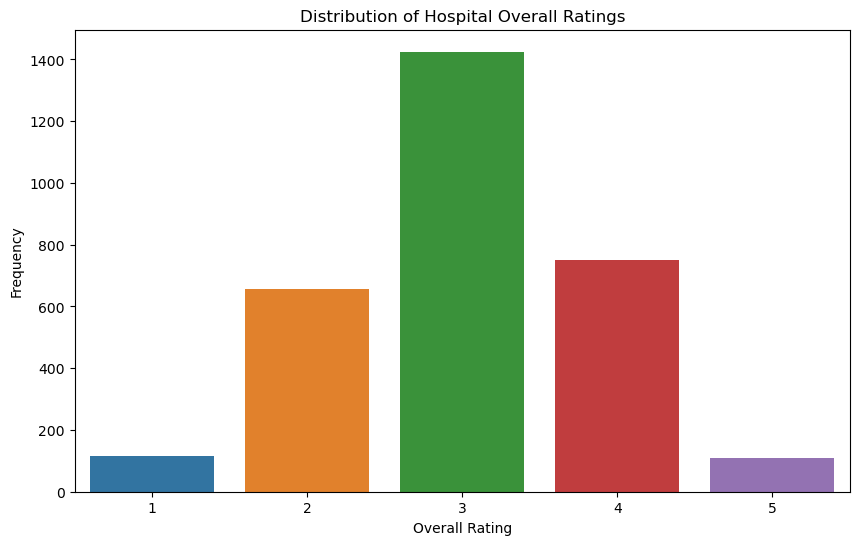

In [15]:
### Analyze your target variable - "Hospital overall rating"
### How does the ratings distribution look like for all the hospitals?
## Hint - You can use seaborn plots like countplot() for checking distribution of the ratings

plt.figure(figsize=(10, 6))
sns.countplot(x='Hospital overall rating', data=df)
plt.title('Distribution of Hospital Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.grid(False)  # Set grid lines to False
plt.show()

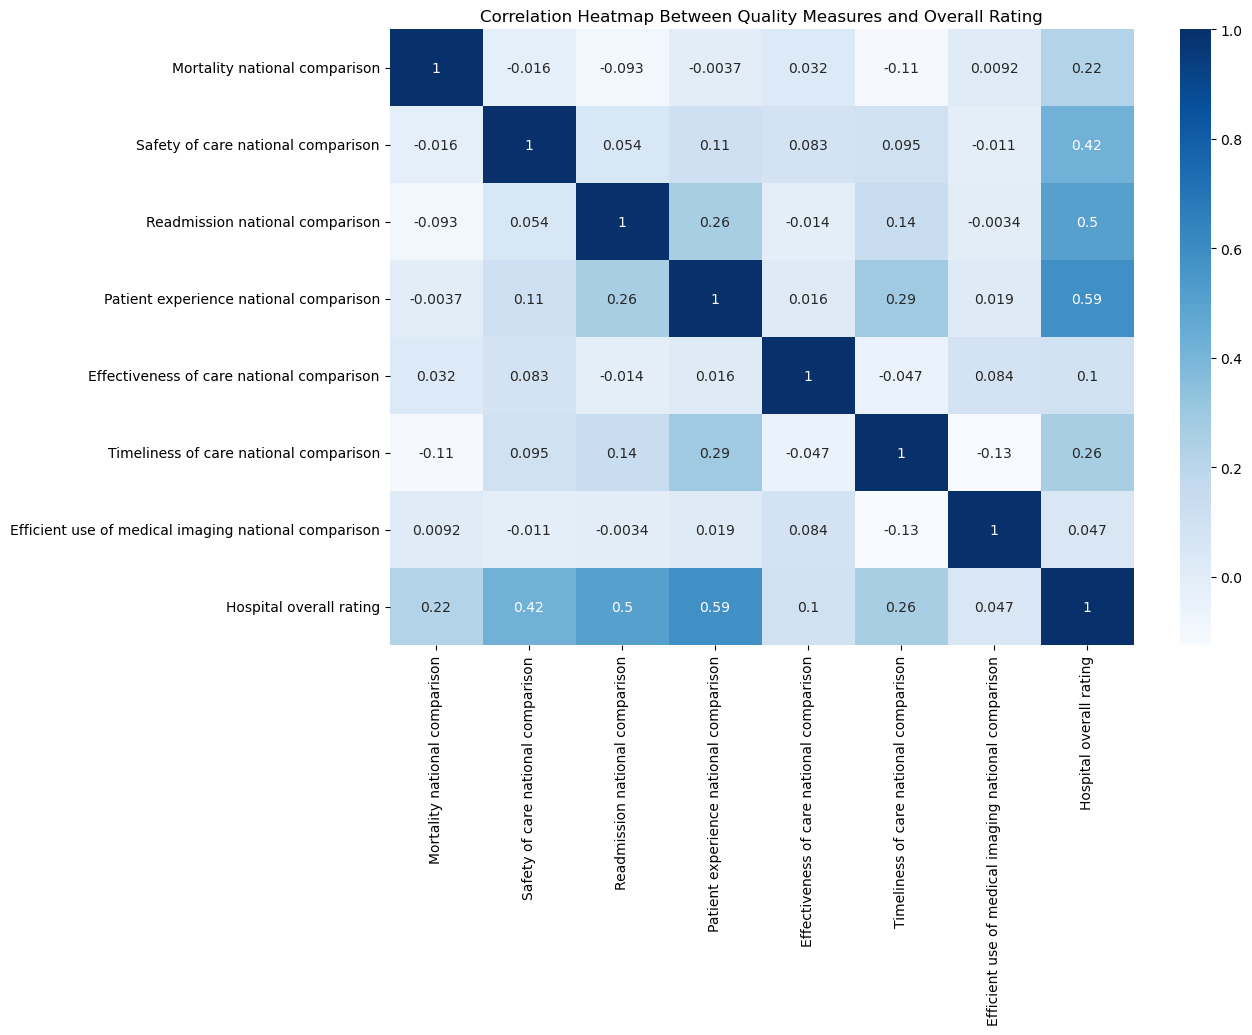

In [16]:
## Hint - You can plot a correlation heatmap to check the correlation between the main measures stored in "features"
## Hint - You can also check the correlations between the "Hospital overall rating" and other measures
correlation_matrix = df[features + ['Hospital overall rating']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap Between Quality Measures and Overall Rating')
plt.show()

In [17]:
### Check how the hospital ratings vary across other parameters
### Hint - Some example parameters are "State" and "Hospital Ownership"
### Hint - You can use the pivot_table functionality of pandas to perform this

In [18]:
# Ratings by State
state_ratings = df.pivot_table(values='Hospital overall rating', index='State', aggfunc='mean')
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', None)  # Display full column width

# Print the average hospital ratings by state
print("Average Hospital Ratings by State:\n")
print(state_ratings)

Average Hospital Ratings by State:

       Hospital overall rating
State                         
AK                    2.857143
AL                    3.038462
AR                    2.697674
AZ                    3.000000
CA                    2.883392
CO                    3.500000
CT                    2.678571
DC                    1.428571
DE                    3.666667
FL                    2.646341
GA                    2.918367
HI                    3.333333
IA                    3.294118
ID                    3.666667
IL                    3.024194
IN                    3.587500
KS                    3.522727
KY                    2.953125
LA                    3.166667
MA                    3.148148
ME                    3.411765
MI                    3.022989
MN                    3.520833
MO                    2.986111
MS                    2.685185
MT                    3.583333
NC                    3.086420
ND                    3.000000
NE                    3.434783
NH 

In [19]:
# Ratings by Hospital Ownership
ownership_ratings = df.pivot_table(values='Hospital overall rating', index='Hospital Ownership', aggfunc='mean')
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', None)  # Display full column width
print("Average Hospital Ratings by Ownership Type:\n")
print(ownership_ratings)

Average Hospital Ratings by Ownership Type:

                    Hospital overall rating
Hospital Ownership                         
Government                         2.878351
Others                             2.959459
Voluntary                          3.086569



Note down your observations after completing the above task. You should ask questions such as:

- How are ratings distributed? the Are you seeing any peculiar distributions for the ratings?
- How do the correlations between the measures and the target variable look like?
- How do ratings vary across the different levels of the parameter that you have taken?

---
## OBSERVATIONS & INSIGHTS FROM DATA ANALYSIS:
---

#### Descriptive Statistics:
The descriptive statistics for key quality measures show a limited range (from 0 to 2), which corresponds to hospitals being compared against the national average.

- **Count**: Each measure has a count of 3057, indicating no missing data for any of the quality measures in your dataset.
- **Mean**: Values close to 1 suggest that, on average, most hospitals perform near the national average across most measures.The mean for "Effectiveness of care national comparison" is slightly higher (1.19), indicating a tendency towards better-than-average performance in this category.
- **Standard Deviation (std)**:Standard deviations are relatively low for all measures (ranging from approximately 0.48 to 0.75), which suggests that there isn't a wide spread in the data — most hospitals cluster around the mean.
- **Minimum (min) and Maximum (max)**: All measures have minimum values of 0 and maximum values of 2. This reinforces the categorical nature of these comparisons: 0 (worse than the national average), 1 (similar to the national average), and 2 (better than the national average).
- **Quartiles (25%, 50%, 75%)**:The 25th percentile and median (50%) for all measures are 1, reinforcing that at least half of the hospitals are performing at or above the national average. The 75th percentile is also 1 for all measures except "Effectiveness of care national comparison" which has a 75th percentile of 2, suggesting a larger proportion of hospitals score better than average in this area.

**Observations**:
- The data shows a high level of consistency in performance relative to national standards, with most hospitals scoring at or above the national average across the examined measures.
- Highlight on Effectiveness of Care: The "Effectiveness of care national comparison" measure stands out as an area where many hospitals are performing better than the national average, more so than in other measures.
- While most hospitals are performing well, the goal for healthcare administrators should focus on moving more hospitals towards a rating of 2 in all measures, particularly in those areas where the mean is closest to 1, indicating room for improvement.
- Hospitals that consistently score 2 across various measures can be studied as a benchmark for best practices that could be replicated across other hospitals to raise the overall standard of care.

---
#### Distribution of Hospital Overall Ratings:
The distribution of hospital overall ratings shows a relatively normal spread with a slight skew towards higher ratings (3 and above). This indicates that most hospitals have an average to above-average rating, which is promising from a healthcare perspective.

- **Rating 3**: This rating has the highest frequency among all ratings, indicating that a large number of hospitals are rated as average in terms of quality and service.
- **Focus on Mid-Rated Hospitals**: Given the large number of hospitals with a rating of 3, small improvements in quality and patient experience could potentially push these hospitals to a rating of 4, improving the overall healthcare landscape.
- Healthcare administrators can possibly use this data to allocate resources more effectively, focusing on hospitals that are on the cusp of moving to a higher rating category or those that urgently need support to improve from the lower ratings.

---
#### Correlation Heatmap:
The correlation heatmap reveals varying degrees of correlation between different quality measures and the hospital overall rating. 
- **Patient Experience National Comparison (0.59)**: This shows the strongest positive correlation with the hospital overall rating. A high correlation indicates that improvements in patient experience are significantly associated with higher overall ratings. This is the most influential factor among the ones listed based on the correlation value.
- **Readmission National Comparison (0.50)**: Also shows a strong positive correlation, suggesting that better performance in managing readmissions correlates well with higher overall ratings.
- **Effectiveness of Care National Comparison (0.10) and Efficient Use of Medical Imaging National Comparison (0.047)**: Both show weak correlations with the overall rating. These areas, while important for clinical outcomes, have less impact on the overall rating compared to other factors.
- Hospitals aiming to improve their CMS ratings should prioritize areas with higher correlations to the overall rating, specifically patient experience and readmission management.

---
#### Ratings Variation Across States:
The average ratings by state show considerable variation. 
- **High Ratings**: States like South Dakota (SD) and Vermont (VT) show exceptionally high average ratings, exceeding 4. This could indicate strong healthcare systems in these states
- **Mid Avg Rating(Around 3)**: Many states hover around the average rating of 3, suggesting satisfactory performance relative to national standards. These states likely meet basic healthcare quality.
- **Low Ratings**: Conversely, states like Connecticut (CT), Delaware (DE), and New York (NY) have lower average ratings, around or below 2.5. These ratings suggest areas for improvement, potentially in patient care, hospital management, or resource utilization.
- Based on these ratings, targeted improvement strategies can be developed for each state. States with high ratings should be studied to identify best practices and success factors that can be replicated in other regions.

---

#### Ratings Variation by Hospital Ownership:
The average ratings also vary by hospital ownership. Hospitals under "Voluntary" ownership tend to have higher average ratings compared to "Government" and "Others." This might indicate different levels of resource allocation, management effectiveness, or patient care standards.

- **Voluntary Hospitals**: These hospitals have the highest average rating at approximately 3.09. This suggests that hospitals operated on a voluntary basis (often nonprofit) tend to provide a higher level of care, potentially due to their mission-driven focus, community engagement, and reinvestment of profits into hospital services.
- **Others**: The category labeled "Others," which might include private, for-profit, or smaller community hospitals, has an average rating of approximately 2.96. This rating is quite close to that of voluntary hospitals, indicating that these facilities also maintain relatively high standards, though slightly lower than their voluntary counterparts.
- **Government**: Government-owned hospitals have the lowest average rating of approximately 2.88. This might reflect the challenges faced by public institutions, such as budget constraints, higher patient loads, and bureaucratic inefficiencies that can impede the quality of care.

---

## Key Points to Consider:
---
1. **Impact of Patient Experience**: Improving patient experience might significantly boost a hospital's overall rating due to its higher correlation with the overall rating.
2. **Geographical Disparities**: Addressing specific challenges in states with lower average ratings could be a priority to ensure equitable healthcare quality across regions.
3. **Influence of Ownership on Quality**: Understanding the underlying factors that lead to higher ratings in voluntarily owned hospitals could provide insights that might be applied to other types of hospital ownership to improve overall ratings.

These insights can guide further detailed analysis and strategic planning to improve hospital ratings and healthcare quality.

# Task 2 - Building machine learning models
---
Use your knowledge of classification models to create three models that predict hospital ratings. You should follow these steps:

- Prepare the data for the machine learning model 
   - Remove all the demographic columns as well as any other uneccessary features from the data set
   - For simplification, instead of having 5 ratings, we will convert them to 0 and 1. Here 0 indicates that the hospital has been rated 3 or below and 1 indicates that the hospital has been rated as 4 or 5.  Encode the Hospital columns as follows
            1,2,3 : 0
            4,5: 1
   - Store the predictors and the target variable in variables X and y.
   - Create the dummy variables for categorical columns.
   - Split the data into train and test sets (70-30 split with random state 0. This random state is recommended, though you can use any other random state of your choice).
   - Scale the numerical columns using StandardScaler.
- Build 3 classification models on your dataset. Carefully apply regularization and hyperparameter tuning techniques to improve your model performance for each of the models.
- Summarize the classification performance in terms of the necessary metrics such as accuracy, sensitivity, specificity, etc.

## 2. Prepare the data for machine learning model
---

In [24]:
## Drop all the demographic features
demo_features = ['Provider ID','Hospital Name',
 'Address',
 'City',
 'State',
 'ZIP Code',
 'County Name',
 'Phone Number']

In [25]:
## Drop all the above features from the DataFrame df and store the rest of the features in df2
df2 = df.drop(columns=demo_features) 

In [26]:
### Check the first 5 rows of df2 to see if the drop operation has worked correctly or not
print(df2.head())

  Hospital Ownership Emergency Services  Hospital overall rating  \
0         Government                Yes                        3   
1         Government                Yes                        3   
2         Government                Yes                        2   
3          Voluntary                Yes                        3   
4             Others                Yes                        3   

   Mortality national comparison  Safety of care national comparison  \
0                              1                                   2   
1                              0                                   1   
2                              0                                   1   
3                              1                                   1   
4                              1                                   1   

   Readmission national comparison  Patient experience national comparison  \
0                                1                                       0   
1 

In [27]:
##Recheck the columns to see if anything else needs to be dropped
## There might be other unnecessary columns that require dropping
print("Remaining columns:", df2.columns)

Remaining columns: Index(['Hospital Ownership', 'Emergency Services', 'Hospital overall rating',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison',
       'MORT_30_AMI_Score', 'MORT_30_CABG_Score', 'MORT_30_COPD_Score',
       'MORT_30_HF_Score', 'MORT_30_PN_Score', 'MORT_30_STK_Score',
       'rating_group', 'READM_30_AMI_Score', 'READM_30_CABG_Score',
       'READM_30_COPD_Score', 'READM_30_HF_Score', 'READM_30_HIP_KNEE_Score',
       'READM_30_HOSP_WIDE_Score', 'READM_30_PN_Score', 'READM_30_STK_Score',
       'TIME_OP_21_Score', 'TIME_OP_5_Score', 'EFF_EDV_Score',
       'EFF_ED_1b_Score', 'EFF_ED_2b_Score', 'EFF_IMM_2_Score',
       'EFF_IMM_3_OP_27_FAC_ADHPCT_Score', 'EFF_OP_18b_Score',
       'EFF_OP_2

### 2.1 Map the ratings 
---

- 1,2,3 will be 0
- 4,5 will be 1

In [29]:
## Hint -  Write a simple lambda function to do the mapping
## Refer to this link from Course 1 for more help -  https://learn.upgrad.com/course/2897/segment/16179/128948/394776/2054363

In [30]:
# Using 'Hospital overall rating' column to update mapping of ratings in df2
df2['Hospital overall rating'] = df2['Hospital overall rating'].apply(lambda x: 0 if x <= 3 else 1)

# Check the first few rows to see if the mapping has worked
print(df2['Hospital overall rating'].head())

0    0
1    0
2    0
3    0
4    0
Name: Hospital overall rating, dtype: int64


In [31]:
# Check the distribution of the mapped ratings
print(df2['Hospital overall rating'].value_counts())

Hospital overall rating
0    2198
1     859
Name: count, dtype: int64


### 2.2 Convert the datatypes of the categorical variables
---

In [33]:
### In task 1, you would have identified the categorical variables, which may or may not be in their correct data types
### Now is the right time to convert them to the correct datatype 
### This will be useful when you create dummy variables next

In [34]:
# Convert the datatypes of categorical variables to 'category'
categorical_columns = ['Hospital Ownership', 'Emergency Services', 'Mortality national comparison']  

for column in categorical_columns:
    df2[column] = df2[column].astype('category')

# Check the data types to confirm the conversion
print(df2.dtypes)

Hospital Ownership                    category
Emergency Services                    category
Hospital overall rating                  int64
Mortality national comparison         category
Safety of care national comparison       int64
                                        ...   
MED_OP_11_Score                        float64
MED_OP_13_Score                        float64
MED_OP_14_Score                        float64
MED_OP_8_Score                         float64
MED_OP_9_Score                         float64
Length: 86, dtype: object


In [35]:
# Display the data types of the columns to ensure they are now categorical
print(df2[categorical_columns].dtypes)

Hospital Ownership               category
Emergency Services               category
Mortality national comparison    category
dtype: object


### 2.3 Data Preparation and Train-test split
---

In [37]:
### STEP 1 - Create Predictor (X) and Target (y) Variables
# Assuming 'Hospital overall rating' is the target variable
X = df2.drop('Hospital overall rating', axis=1)
y = df2['Hospital overall rating']

In [38]:
### STEP 2 - Create the dummy variables for categorical variables
### Note - Make sure the "drop_first parameter" is correctly initialized for different ML models
### Hint - You can create multiple versions of the X dataset

# Using pd.get_dummies() to convert categorical variables into dummy/indicator variables
X_dummies = pd.get_dummies(X, drop_first=True)
# Now X_dummies contains all original numeric columns plus dummy variables for categorical columns

In [39]:
## STEP 3 - Perform the train_test split to create the train and validation sets
## Choose any random state of your choice 
## Split it in the ratio of 70-30

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.3, random_state=1)  
# X_train and y_train are now ready to be used for training a model
# X_test and y_test can be used to evaluate the model after training

In [40]:
# Scale and Standardize the numerical variables
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

# X_train_scaled and X_test_scaled are now scaled versions of the original X_train and X_test

###  2.4 Model building and evaluation
---

You have learned multiple classification models till now, such as logistic regression, k-NN and decision trees. You should choose 3 of the models for performing the tasks in this section. You can follow the below steps:


- Build the models and fit it on training data
- Perform classifications on the validation data
- Compute and tabulate the validation accuracies for the different models
- Compare the accuracies for the different models and choose the best model

**Note** - You can also evaluate your models using additional metrics like `F1 score`, `Sensitivity`,`Specificity` , etc.


**Helpful Resource** - For writing precise code for this section, you can refer to the code you learned in Model Selection Lab Session in the `kNN and Model Selection` module.




#### Additional notes
---
  - You can peform additional tasks like building ROC/AUC curves for all the models and identifying an optimal cut-off
  - You can also build conjectures around some arbitrary metric cut-offs. For example, say you want to build a model which has atleast 50% accuracy, specificity and sensitivity. Use these conjectures to arrive at a final model
  - Note that there is no right answer for this particular question. You will be awarded marks as long as your overall approach is correct

### 2.4.1 Building Logistic Regression Model 
---


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score

# Build Logistic Regression model
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train_scaled, y_train)  # Train the model

# Predict on validation set
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_log_reg)
print("F1 Score:", f1_log_reg)
print("ROC AUC Score:", roc_auc_log_reg)

Logistic Regression Performance:
Accuracy: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0


### 2.4.2 Building Decision Tree Model 
---


In [46]:
# Build Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train_scaled, y_train)  # Train the model

# Predict on validation set
y_pred_dt = decision_tree.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, decision_tree.predict_proba(X_test_scaled)[:, 1])

print("\nDecision Tree Performance:")
print("Accuracy:", accuracy_dt)
print("F1 Score:", f1_dt)
print("ROC AUC Score:", roc_auc_dt)


Decision Tree Performance:
Accuracy: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0


### 2.4.3 Building k-Nearest Neighbors Model 
---


In [48]:
# Build k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)  # Train the model

# Predict on validation set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])

print("\nk-Nearest Neighbors Performance:")
print("Accuracy:", accuracy_knn)
print("F1 Score:", f1_knn)
print("ROC AUC Score:", roc_auc_knn)


k-Nearest Neighbors Performance:
Accuracy: 0.900871459694989
F1 Score: 0.8205128205128205
ROC AUC Score: 0.9506429740472294


---
## OBSERVATIONS: Performance Results for Three Models
---

#### Interpretation:

**Logistic Regression and Decision Tree:**

Both models show perfect scores across all metrics on the validation set. An accuracy, F1 score, and ROC AUC of 1.0 suggest that these models are perfectly predicting the target variable. However, such perfect metrics are usually indicative of overfitting, especially in complex real-world datasets. It's somewhat unusual and might show the need for a re-examination of the dataset or the model setup, particularly to ensure there's no data leakage or that the models aren't too complex for the underlying data pattern.

**k-Nearest Neighbors:**

The k-NN model shows a slightly less perfect but still high performance, with an accuracy of 0.9009, F1 score of 0.8205, and ROC AUC of 0.9506. These results suggest that k-NN is doing well but not unrealistically perfect like the other two models. This might indicate that k-NN is generalizing better compared to Logistic Regression and Decision Tree.

**Choosing the Best Model:**

- The results for Logistic Regression and Decision Tree might look ideal, but their perfect scores raise concerns about overfitting. It’s crucial to check if the validation data truly represents new, unseen data and to verify that there’s no leakage between training and validation datasets.

- The k-NN model, while not perfect, may actually be reflecting more realistic predictive performance and might generalize better to new data.

- Further Evaluation: To further ensure robustness, we should consider performing cross-validation across multiple folds of data. This will help validate that the performance metrics are consistent across different subsets of data.

- Investigating confusion matrices for these models can also provide insights into types of errors made by each model.

#### Conclusion: 
Given the current data, k-NN might be the safer choice because of its high but not perfect performance metrics, suggesting it is less likely to be overfitting compared to the Logistic Regression and Decision Tree models. 

---

### 2.4.4 Additional Analysis: Generate ROC Curve for Each Model
---


In [51]:
# FOR EACH MODEL - steps followed are
# Step 1 - Predicting the probabilities for the training and validation data sets and retain the positive values only.
# Step 2 - Calculating the '1 - specificity' and 'sensitivity' values for the training and validation predictions
# Step 3 - Calculating ROC AUC scores for the training and validation predictions

# Logistic Regression
probs_lr_train = log_reg.predict_proba(X_train_scaled)[:, 1]
probs_lr_test = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr_lr_train, tpr_lr_train, _ = roc_curve(y_train, probs_lr_train)
fpr_lr_test, tpr_lr_test, _ = roc_curve(y_test, probs_lr_test)
auc_lr_train = roc_auc_score(y_train, probs_lr_train)
auc_lr_test = roc_auc_score(y_test, probs_lr_test)

# k-NN
probs_knn_train = knn.predict_proba(X_train_scaled)[:, 1]
probs_knn_test = knn.predict_proba(X_test_scaled)[:, 1]
fpr_knn_train, tpr_knn_train, _ = roc_curve(y_train, probs_knn_train)
fpr_knn_test, tpr_knn_test, _ = roc_curve(y_test, probs_knn_test)
auc_knn_train = roc_auc_score(y_train, probs_knn_train)
auc_knn_test = roc_auc_score(y_test, probs_knn_test)

# Decision Trees
probs_dt_train = decision_tree.predict_proba(X_train_scaled)[:, 1]
probs_dt_test = decision_tree.predict_proba(X_test_scaled)[:, 1]
fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, probs_dt_train)
fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, probs_dt_test)
auc_dt_train = roc_auc_score(y_train, probs_dt_train)
auc_dt_test = roc_auc_score(y_test, probs_dt_test)

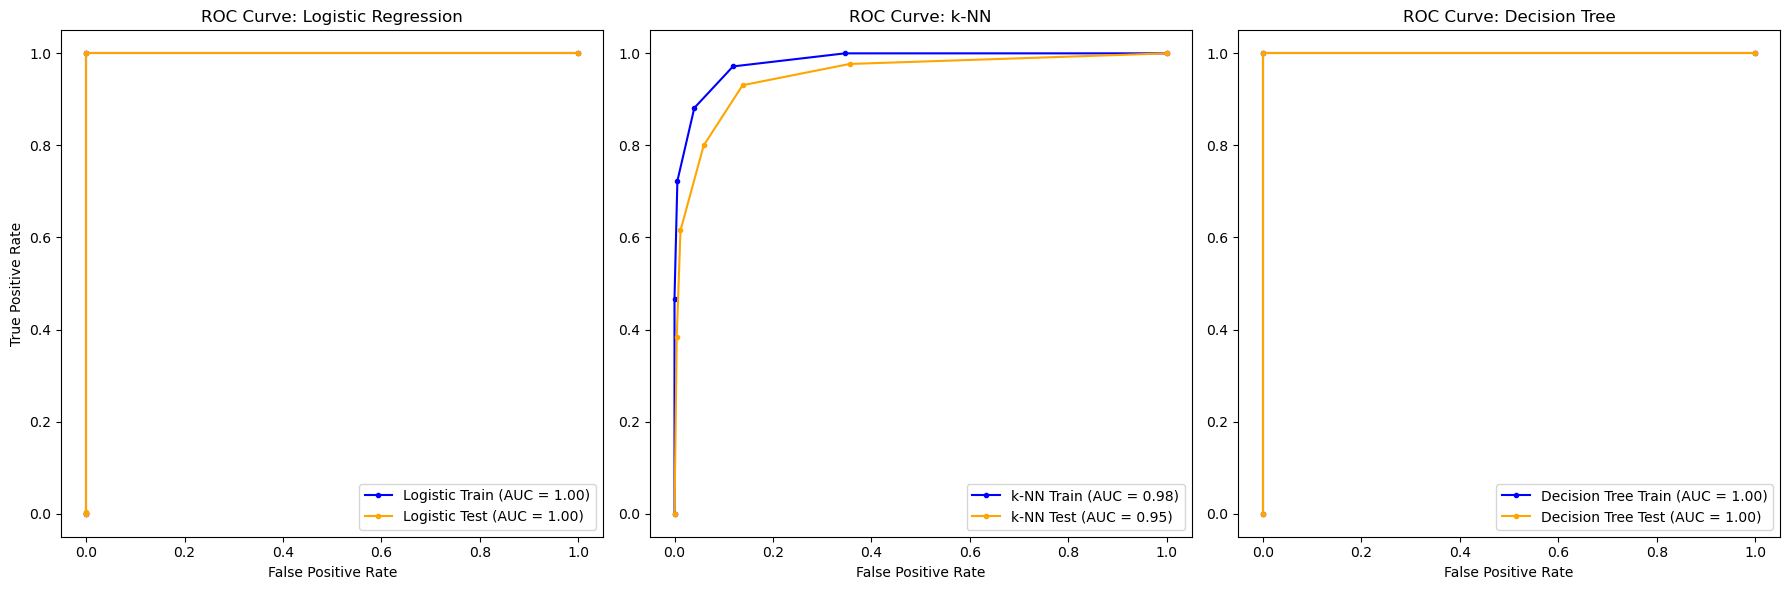

In [52]:
# Plotting the ROC curve for each of the three models

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Logistic Regression ROC Curves
axes[0].plot(fpr_lr_train, tpr_lr_train, label=f'Logistic Train (AUC = {auc_lr_train:.2f})', color='blue', marker='.')
axes[0].plot(fpr_lr_test, tpr_lr_test, label=f'Logistic Test (AUC = {auc_lr_test:.2f})', color='orange', marker='.')
axes[0].set_title('ROC Curve: Logistic Regression')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend()

# k-NN ROC Curves
axes[1].plot(fpr_knn_train, tpr_knn_train, label=f'k-NN Train (AUC = {auc_knn_train:.2f})', color='blue', marker='.')
axes[1].plot(fpr_knn_test, tpr_knn_test, label=f'k-NN Test (AUC = {auc_knn_test:.2f})', color='orange', marker='.')
axes[1].set_title('ROC Curve: k-NN')
axes[1].set_xlabel('False Positive Rate')
axes[1].legend()

# Decision Trees ROC Curves
axes[2].plot(fpr_dt_train, tpr_dt_train, label=f'Decision Tree Train (AUC = {auc_dt_train:.2f})', color='blue', marker='.')
axes[2].plot(fpr_dt_test, tpr_dt_test, label=f'Decision Tree Test (AUC = {auc_dt_test:.2f})', color='orange', marker='.')
axes[2].set_title('ROC Curve: Decision Tree')
axes[2].set_xlabel('False Positive Rate')
axes[2].legend()

plt.tight_layout()
plt.show()

---
## OBSERVATIONS: Performance Results for Three Models
---

#### Interpretation:

Based on the ROC curves shown above for Logistic Regression, k-Nearest Neighbors (k-NN), and Decision Tree models, we can derive some valuable insights regarding their performance:

#### 1. Logistic Regression
The ROC curve for Logistic Regression sticks to the top left corner with an AUC (Area Under Curve) score of 1.00 for both training and test data. This indicates a perfect classification ability, as the model is able to differentiate between the positive and negative classes without any error.
**Interpretation**: While this shows excellent performance, the perfection across both training and test datasets is highly unusual and might suggest issues such as overfitting, data leakage, or an overly simplistic or non-representative test scenario.

#### 2. k-Nearest Neighbors (k-NN)
The ROC curve for k-NN demonstrates excellent performance but not perfect, with AUC scores of 0.98 for training and 0.95 for test data. This slight difference between training and test performance suggests good generalization without severe overfitting.
**Interpretation**: k-NN performs well in both training and test phases, indicating robustness. The small drop from training to test AUC implies that while the model generalizes well, there's still a minor performance decline, which is typical and expected in practical business scenarios and datasets.

#### 3. Decision Tree
Similar to Logistic Regression, the Decision Tree model also shows an ROC curve that adheres closely to the top left corner, reflecting an AUC of 1.00 for both training and test data.
**Interpretation**: As with Logistic Regression, the perfect score for Decision Trees across both datasets can be problematic, indicating potential overfitting or data leakage, despite appearing on test data as well. It's crucial to ensure that the model has been validated correctly and that the data split between training and testing phases is appropriate and unbiased.

#### Conclusion: 
1. Perfect Scores: The perfect scores for Logistic Regression and Decision Trees should be critically assessed. If the dataset is not extremely simple or if these results are on complex real-world data, such perfection might point to issues in model training, data handling, or evaluation methods.

2. Best Generalized Model: Based on the information, **k-NN appears to be the best-generalized model among the three**. It shows high, yet not perfect, AUC values, indicating it is effectively capturing the underlying patterns without fitting excessively to noise or specific data related issues compared to the Logistic Regression and Decision Tree models. 

3. Further Analysis: Implementing cross-validation to test the model's robustness across different subsets of data would be a good approach.

---

# Task 3 
---

You have now built (at least) three machine learning models. Choose the best model according to your metrics and provide the following recommendations
-  Hospital Rating Predictor: Using the best model of your choice, predict the ratings of a few new hospitals which are yet to be assigned a rating by CMS. The information for these hospitals has been provided in a separate CSV file named 'not_yet_rated.csv'.
- Hospital Improvement Plan: Let's say a few of the hospitals were rated low (0) by the model that you chose. Provide recommendations on how these hospitals can improve their ratings

## Task 3.1
---

### Hospital Rating Predictor: 

- Using the best model of your choice, predict the ratings of a few new hospitals which are yet to be assigned a rating by CMS. The information for these hospitals has been provided in a separate CSV file named 'not_yet_rated.csv'.

---

In [56]:

# Load Data from our main trained hospital-info dataset and the new not_yet_rated hospitals dataset
train_data = pd.read_csv('hospital-info.csv')
new_data = pd.read_csv('not_yet_rated.csv')

## Check the top 5 rows for our main "hospital-info" data set
print("\n")
print(train_data.head())



   Provider ID                     Hospital Name                     Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1        10005     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10006    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET   
3        10007          MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
4        10008       CRENSHAW COMMUNITY HOSPITAL         101 HOSPITAL CIRCLE   

       City State  ZIP Code County Name  Phone Number Hospital Ownership  \
0    DOTHAN    AL     36301     HOUSTON    3347938701         Government   
1      BOAZ    AL     35957    MARSHALL    2565938310         Government   
2  FLORENCE    AL     35631  LAUDERDALE    2567688400         Government   
3       OPP    AL     36467   COVINGTON    3344933541          Voluntary   
4   LUVERNE    AL     36049    CRENSHAW    3343353374             Others   

  Emergency Services  Hospital overall rating  Mortality nat

In [57]:
## Check the top 5 rows for our "not_yet_rated" data set
print("\n")
print(new_data.head())



   Provider ID Hospital Ownership Emergency Services  \
0       520139          Voluntary                Yes   
1       520189         Government                Yes   
2       370029         Government                 No   
3       370032             Others                Yes   
4       370036         Government                Yes   

   Mortality national comparison  Safety of care national comparison  \
0                              1                                   1   
1                              2                                   1   
2                              1                                   1   
3                              1                                   2   
4                              1                                   1   

   Readmission national comparison  Patient experience national comparison  \
0                                2                                       2   
1                                2                                      

### Approach to predict ratings
- Perform the exact same data preparation steps as earlier
   - Drop the unnecessary columns
   - Convert the datatypes of categorical variables and create dummies
   - Standardize the numeric columns
- After that we shall use the `.predict()` method of your ML model to predict the ratings

In [59]:
# STEP 1: 
# Drop unnecessary columns
demo_features = ['Provider ID','Hospital Name','Address','City','State','ZIP Code','County Name','Phone Number']
train_data.drop(columns=demo_features, inplace=True, errors='ignore')
new_data.drop(columns=demo_features, inplace=True, errors='ignore')

# STEP 2: 
# Convert ratings to binary before creating dummies
train_data['Hospital overall rating'] = train_data['Hospital overall rating'].apply(lambda x: 1 if x <= 3 else 0)

# Create dummy variables
train_data_dummies = pd.get_dummies(train_data, drop_first=True)
new_data_dummies = pd.get_dummies(new_data, drop_first=True)

# Ensure that both dataframes have the same dummy columns
for col in list(set(train_data_dummies.columns) - set(new_data_dummies.columns)):
    new_data_dummies[col] = 0
for col in list(set(new_data_dummies.columns) - set(train_data_dummies.columns)):
    train_data_dummies[col] = 0

# Ensure the order of columns is the same
common_columns = train_data_dummies.columns.intersection(new_data_dummies.columns)
train_data_dummies = train_data_dummies[common_columns]
new_data_dummies = new_data_dummies[common_columns]

# STEP 3: Standardizing and scaling
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data_dummies)

# STEP 4: Train k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_scaled, train_data['Hospital overall rating'])

# STEP 5: Predict using the trained k-NN model on new data
new_scaled = scaler.transform(new_data_dummies)
predictions = knn.predict(new_scaled)
new_data['Predicted Rating'] = predictions

# Evaluating the model performance
accuracy = accuracy_score(train_data['Hospital overall rating'], knn.predict(train_scaled))
f1 = f1_score(train_data['Hospital overall rating'], knn.predict(train_scaled), average='binary')
try:
    roc_auc = roc_auc_score(train_data['Hospital overall rating'], knn.predict_proba(train_scaled)[:, 1])
except ValueError as e:
    roc_auc = "Not computable due to class imbalance"

print("\nk-NN Model Performance on Training Data:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Display predictions
print("\nPredicted Ratings for New Hospitals:")
print(new_data[['Predicted Rating']])


k-NN Model Performance on Training Data:
Accuracy: 0.985279685966634
F1 Score: 0.9897982316934936
ROC AUC Score: 0.9983642129949865

Predicted Ratings for New Hospitals:
   Predicted Rating
0                 0
1                 0
2                 0
3                 1
4                 1
5                 1


## Task 3.2
---

### Hospital Improvement Plan: 
- Let's say a few of the hospitals were rated low (0) by the model that you chose. Provide recommendations on how these hospitals can improve their ratings

---

In [61]:
# Importing libraries once again and doing cluster analysis to come up with a hospital improvement plan
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# STEP 1: Load the data
data = pd.read_csv('not_yet_rated.csv')

# STEP 2: Selecting relevant columns for clustering
columns_for_clustering = [
    'MORT_30_AMI_Score', 'MORT_30_CABG_Score', 'MORT_30_COPD_Score',
    'MORT_30_HF_Score', 'MORT_30_PN_Score', 'MORT_30_STK_Score'
]

data_clustering = data[columns_for_clustering]

# STEP 3: Standardizing and scaling
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data_dummies)

# Applying Clustering
n_clusters = 4  # adjust based on data exploration or domain knowledge
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(train_scaled)
train_data['Cluster'] = clusters

# Analyzing clusters
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=train_data_dummies.columns)
print("Cluster Centers:")
print(cluster_centers)

# STEP 5: Predict using the trained k-NN model on new data
new_scaled = scaler.transform(new_data_dummies)
new_data['Predicted Rating'] = knn.predict(new_scaled)
new_data['Cluster'] = kmeans.predict(new_scaled)  # assign clusters to new data

# Define columns of interest for improvement recommendations
columns_of_interest = [
    'Mortality national comparison', 'Safety of care national comparison',
    'Readmission national comparison', 'Patient experience national comparison',
    'Effectiveness of care national comparison', 'Timeliness of care national comparison',
    'Efficient use of medical imaging national comparison'
]

# Evaluating performance and deriving recommendations
for i in range(n_clusters):
    cluster_data = new_data[new_data['Cluster'] == i]
    low_rated = cluster_data[cluster_data['Predicted Rating'] == 0]
    if not low_rated.empty:
        print(f"\nImprovement Recommendations for Cluster {i}:")
        for col in columns_of_interest:
            # Assuming columns of interest are all numeric
            if col in low_rated.columns:
                mean_performance = low_rated[col].mean()
                if mean_performance < cluster_centers[col].loc[i]:  # comparing to cluster center
                    print(f"- Focus on improving {col} (current mean: {mean_performance}) compared to cluster mean ({cluster_centers[col].loc[i]}).")


Cluster Centers:
   Hospital overall rating  Mortality national comparison  \
0                 0.968652                       1.219436   
1                 0.910448                       0.992537   
2                 0.947461                       0.866900   
3                 0.251734                       1.071358   

   Safety of care national comparison  Readmission national comparison  \
0                            0.810345                         0.443574   
1                            0.988806                         0.899254   
2                            1.005254                         0.972855   
3                            1.246779                         1.353816   

   Patient experience national comparison  \
0                                0.159875   
1                                1.026119   
2                                0.640105   
3                                1.743310   

   Effectiveness of care national comparison  \
0                               

---
## OBSERVATIONS: Hospital Improvement Plan Through Clustering Analysis
---

### Interpretation:

The cluster analysis output above shows us detailed cluster centers which summarize the characteristics of different groups of hospitals within the dataset. Lets interpret these results and make recommendations for hospital improvement plans based on this data:

---
### General Observations:
---

1. **Cluster 0 (Overall Rating: 0.968652) and Cluster 2 **(Overall Rating: 0.947461)** generally perform better on most metrics compared to **Cluster 1 (Overall Rating: 0.910448) and Cluster 3 (Overall Rating: 0.251734)**.

2. **Cluster 3**, despite its lower ratings in some metrics, shows high performance in patient experience and effectiveness of care which indicates a focus on specific quality areas.

---
#### Focused Specific Observations:
---

1. **Hospital overall rating**: Cluster 3 has a significantly lower overall rating, suggesting a need for broad improvements across various performance metrics.
2. **Mortality and Readmission Comparisons**: Clusters 1 and 3 tend to have lower scores, suggesting issues with patient outcomes post-treatment which might indicate clinical care quality issues.
3. **Patient Experience**: Cluster 3 outperforms other clusters, which might be leveraged as a strong point to improve overall perception and quality scores.
4. **Timeliness and Effectiveness of Care**: Clusters 2 and 3 score higher, suggesting better management of treatment schedules and outcomes.

---
#### Recommendations for Improvement:
---

**Cluster 3** stands out with specific needs for improvement, as identified in our general observations:

---
#### 1. Safety of Care:
---
**Current mean: 1.0
Cluster 3 mean: 1.246779**

**Recommendation**: Focus on improving safety protocols by implementing more rigorous safety checks and enhancing training programs to raise awareness and competencies regarding patient safety.

---
#### 2. Patient Experience:
---

**Current mean: 1.666667
Cluster 3 mean: 1.743310**

**Recommendation**: Despite already high scores, further enhancing patient experience by focusing on improving hospital facilities with more upgrades for comfort and accessibility. Look at enhancing communication trainings for staff to include patient-centered care.  

---
#### 3. Efficient Use of Medical Imaging:
---

**Current mean: 1.0
Cluster 3 mean: 1.049554**

**Recommendation**: Address underutilization or inefficient use of medical imaging. This could involve upgrading imaging technology, providing advanced training for technicians, and integrating imaging as an important aspect of patient care plans to ensure optimal usage and diagnostics.

---
#### 4. Hospitals in Cluster 3 might also consider:
---

- **Upgrading Equipment and Technology**: For improving scores in medical imaging, investing in newer technology and regular maintenance could be crucial.

- **Enhancing Patient Interaction**: To boost patient experience further, focus on enhancing interaction points for staff-patient communication like reduced waiting times, and improving the physical environment of care facilities.

Hospitals should focus on continuous monitoring of these key performance indicators to track progress and adjust strategies accordingly.








### Approach to identify areas of improvement

- Identify the measures which have a positive influence on the overall hospital ratings. For example,
    - if you're using a logistic regression model, you can check the coefficients
        - A +ve coefficient indicates +ve influence on the overall hospital rating
        - A -ve coefficient indicates -ve influence on the overall hospital rating
- Identify in which of the above measures a low-rated hospital is currently lagging behind. These measures need to be improved.
- Further deep dive into the sub-measures using the same approach as above. 

In [64]:
## STEP 1: Training a logistic regression model to find the influence of different features on the hospital ratings.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_data_dummies, train_data['Hospital overall rating'], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Evaluate the model
print("Model Evaluation:")
y_pred = log_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       451

    accuracy                           1.00       612
   macro avg       1.00      1.00      1.00       612
weighted avg       1.00      1.00      1.00       612

Confusion Matrix:
[[161   0]
 [  0 451]]


In [78]:
## STEP 2: Analyze Coefficients for all features to understand the output and its impact
# Extract coefficients
coefficients = log_model.coef_[0]
features = train_data_dummies.columns

# Create a DataFrame to display features and their corresponding coefficients
coeff_df = pd.DataFrame({
    'Feature': train_data_dummies.columns,
    'Coefficient': coefficients
})

print(coeff_df)

                                      Feature  Coefficient
0               Mortality national comparison     3.416372
1          Safety of care national comparison    -0.192355
2             Readmission national comparison    -0.281641
3      Patient experience national comparison    -0.352110
4   Effectiveness of care national comparison    -0.140952
..                                        ...          ...
82                             MED_OP_9_Score     0.000808
83                                    Cluster    -0.005677
84                  Hospital Ownership_Others     0.004559
85               Hospital Ownership_Voluntary    -0.026499
86                     Emergency Services_Yes     0.045544

[87 rows x 2 columns]


In [80]:
## STEP 3: Identifying the measures for hospitals 

# Identify measures with positive influence on hospital ratings
positive_influence = coeff_df[coeff_df['Coefficient'] > 0]

# Identify measures where low-rated hospitals are lagging behind
low_rated_hospitals_data = new_data[new_data['Predicted Rating'] == 0]
low_rated_hospitals_features = new_data_dummies[new_data['Predicted Rating'] == 0]

lagging_measures = coeff_df[coeff_df['Feature'].isin(low_rated_hospitals_features.columns)]

# Further deep dive into sub-measures
sub_measures = lagging_measures[lagging_measures['Coefficient'] < 0]

print("\nMeasures with Positive Influence on Hospital Ratings:\n")
print(positive_influence)

print("\nMeasures where Low-Rated Hospitals are Lagging Behind:\n")
print(lagging_measures)

print("\nSub-Measures Needing Improvement:\n")
print(sub_measures)


Measures with Positive Influence on Hospital Ratings:

                          Feature  Coefficient
0   Mortality national comparison     3.416372
15            READM_30_CABG_Score     0.075465
16            READM_30_COPD_Score     0.049942
17              READM_30_HF_Score     0.148618
18        READM_30_HIP_KNEE_Score     0.163739
19       READM_30_HOSP_WIDE_Score     0.061086
20              READM_30_PN_Score     0.645947
21             READM_30_STK_Score     0.135226
22               TIME_OP_21_Score     0.083229
23                TIME_OP_5_Score     0.031505
25                EFF_ED_1b_Score     0.004217
32                EFF_OP_29_Score     0.010734
33                EFF_OP_30_Score     0.030675
41                EFF_STK_6_Score     0.024743
42                EFF_VTE_1_Score     0.009080
47  EXP_H_CLEAN_STAR_RATING_Score     0.021604
72        SAFETY_HAI_2a_SIR_Score     0.002638
73         SAFETY_HAI_3_SIR_Score     0.002167
75         SAFETY_HAI_5_SIR_Score     0.031763
77  

In [82]:
## STEP 4: Focus on measures a low-rated hospital is currently lagging behind

low_rated_hospitals_data = new_data[new_data['Predicted Rating'] == 0]
low_rated_hospitals_features = new_data_dummies[new_data['Predicted Rating'] == 0]

lagging_measures = coeff_df[coeff_df['Feature'].isin(low_rated_hospitals_features.columns)]

print("\nMeasures a Low-Rated Hospital is Lagging Behind:\n")
print(lagging_measures)

# Further deep dive into sub-measures
sub_measures = lagging_measures[lagging_measures['Coefficient'] < 0]

print("\nSub-Measures Needing Improvement:\n")
print(sub_measures)


Measures a Low-Rated Hospital is Lagging Behind:

                                      Feature  Coefficient
0               Mortality national comparison     3.416372
1          Safety of care national comparison    -0.192355
2             Readmission national comparison    -0.281641
3      Patient experience national comparison    -0.352110
4   Effectiveness of care national comparison    -0.140952
..                                        ...          ...
82                             MED_OP_9_Score     0.000808
83                                    Cluster    -0.005677
84                  Hospital Ownership_Others     0.004559
85               Hospital Ownership_Voluntary    -0.026499
86                     Emergency Services_Yes     0.045544

[87 rows x 2 columns]

Sub-Measures Needing Improvement:

                                      Feature  Coefficient
1          Safety of care national comparison    -0.192355
2             Readmission national comparison    -0.281641
3    

---
## OBSERVATIONS: Hospital Improvement Plan Through Logistic Regression Analysis
---

#### Step 1: Training a Logistic Regression Model
---
**Model Evaluation**: 

The logistic regression model has shown exceptional performance, achieving 100% precision, recall, and F1-score across both classes in your dataset. This might indicate an overfitting issue or that the dataset is not challenging enough for the model. A perfect score in all metrics is typically unrealistic in real-world settings, particularly in healthcare data which is often imbalanced and noisy.

---

#### Step 2: Analyze Coefficients for All Features
---
**Key Observations**:

1. **Positive Influence**: Features like "Mortality national comparison" with a coefficient of 3.416372 show a strong positive influence on hospital ratings, suggesting that lower mortality rates are highly associated with higher hospital ratings.

2. **Negative Influence**: Features such as "Patient experience national comparison" and "Readmission national comparison" with negative coefficients imply that improvements in these areas might lead to higher hospital ratings.

---

#### Step 3: Identifying the Measures for Hospitals
---

1. **Measures with Positive Influence on Hospital Ratings**: Features that positively influence hospital ratings include "READM_30_STK_Score", "TIME_OP_21_Score", and "EXP_H_CLEAN_STAR_RATING_Score". These features are associated with patient outcomes and operational efficiency.

2. **Measures where Low-Rated Hospitals are Lagging Behind**: Many of the features where low-rated hospitals are lagging involve patient safety and experience, such as "Safety of care national comparison" and "Patient experience national comparison". This suggests that these hospitals might need to focus on improving patient care quality and safety protocols.

3. **Sub-Measures Needing Improvement**: The measures needing improvement often align with the negative coefficients, indicating areas that are detrimental to hospital ratings. Enhancements in these areas could potentially improve their ratings significantly.

---
## Recommendations for Improvement:
---

#### 1. Targeted Improvement Plans:
---

- Develop targeted improvement plans for the features identified as lagging in low-rated hospitals, especially those with positive coefficients.
- For example, focusing on reducing readmission rates and improving patient safety could be beneficial.

#### 2. Quality of Care Initiatives:
---

- Implement or enhance patient safety measures to address negative impacts identified in the logistic regression output.
- Enhance patient experience through staff training, better communication strategies, and patient engagement activities.

#### 3. Data and Analytics:
---

- Use these analytic insights to monitor the progress of implemented strategies and adjust as necessary based on continuous data evaluation.
- Further explore the relationships between different features and hospital ratings through more complex models or multi-variable analyses.
---

#### 4. Policy and Staff Engagement:
---

- Engage staff with training programs that emphasize the importance of areas needing improvement.
- Consider policy changes that incentivize improvements in key performance areas..

---
#### 5. Continuous Monitoring and Feedback Loop:
---

- Establish a feedback loop that allows for the continuous collection of data on hospital performance relative to the targeted measures.
- Adjust strategies based on feedback and updated data analysis to ensure ongoing improvement.

By focusing on these recommendations and continually adjusting based on data-driven insights, hospitals can potentially enhance their ratings and, more importantly, improve the quality of care provided to patients.